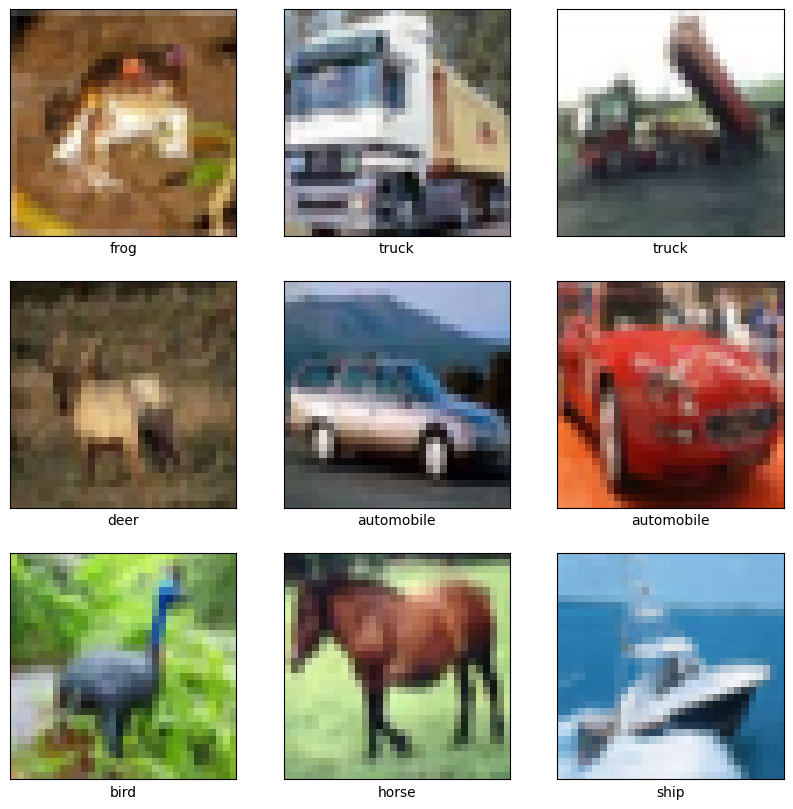

In [24]:
#Data Preprocessing
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset (replace with your custom dataset if needed)
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize the data to [0, 1] range
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode the labels (10 classes)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Function to plot sample images
def plot_images(images, labels, class_names):
    plt.figure(figsize=(10, 10))
    batch_size = len(images)  # Dynamically adjust based on batch size
    rows = int(np.sqrt(batch_size))
    cols = int(np.ceil(batch_size / rows))
    
    for i in range(batch_size):
        plt.subplot(rows, cols, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i])
        plt.xlabel(class_names[np.argmax(labels[i])])
    plt.show()

# Display a few sample images
plot_images(X_train[:9], y_train[:9], class_names)

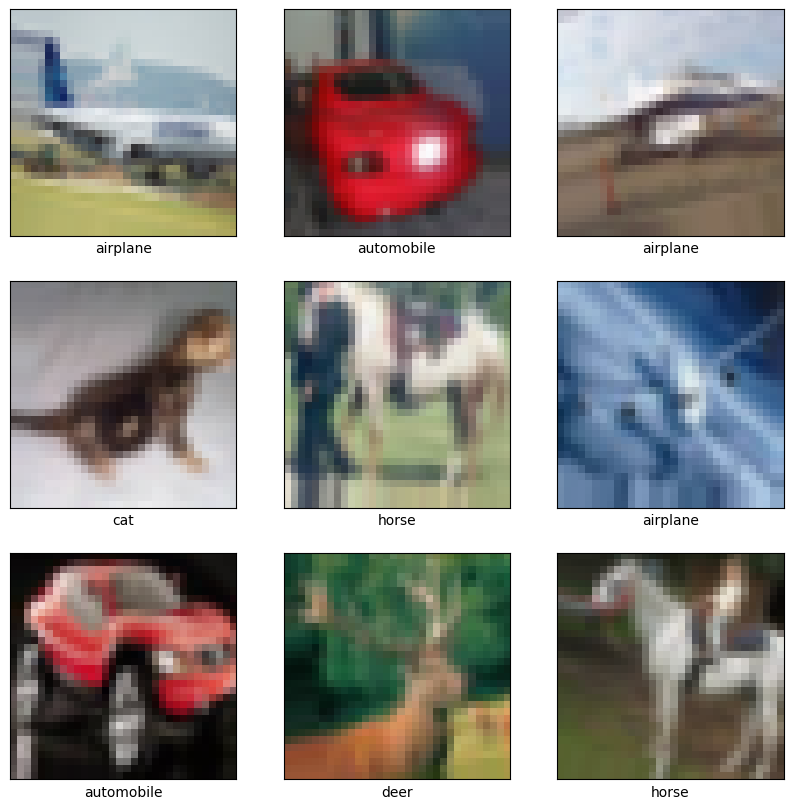

In [25]:
#Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)

# Fit the data generator on the training data
datagen.fit(X_train)

# Display augmented images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    plot_images(X_batch, y_batch, class_names)
    break


In [26]:
#Model Architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input

# Define the CNN architecture with an explicit Input layer
model = Sequential()

# Explicitly define the input layer
model.add(Input(shape=(32, 32, 3)))

# First block: 32 filters
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Second block: 64 filters
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Third block: 128 filters
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Fully connected layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))  # Output layer for 10 classes

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_42 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_42          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_43          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_44          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_45          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_46          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_47          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         2,57

 Total params: 815,914 (3.11 MB)

 Trainable params: 815,018 (3.11 MB)

 Non-trainable params: 896 (3.50 KB)

In the model architecture I created for the CNN, I designed the network in blocks to systematically group layers that together perform a series of operations (convolution, batch normalization, pooling, dropout). Let me explain what a block is, why I used this approach, and how many layers were used:

What is a "Block" in CNN Architecture?
A block in CNN architecture is a group of layers that perform specific operations to extract features from the input data at different levels. Typically, each block consists of:

Convolutional layers: Extract features using filters/kernels.
Batch normalization: Stabilizes and speeds up training by normalizing activations.
Pooling layers: Reduce the dimensionality of the feature maps while retaining the most important information.
Dropout layers: Help prevent overfitting by randomly dropping some units during training.
The architecture is built with several blocks that gradually decrease the spatial size of the image while increasing the depth of the network (i.e., the number of filters), which helps in capturing more complex features from the images as you go deeper into the network.

Why Use This Approach?
Hierarchical Feature Learning: Convolutional layers in each block learn different levels of abstraction. For example:

The first block learns low-level features (edges, textures).
The second block learns more complex features (shapes, parts of objects).
The third block learns even more abstract features (entire objects or combinations of parts).
Efficient Dimensionality Reduction: Pooling layers in each block reduce the spatial resolution of the feature maps, making the computation more efficient and reducing the risk of overfitting.

Regularization and Stability: Batch normalization helps stabilize the learning process by normalizing activations. Dropout layers prevent the model from becoming too dependent on specific neurons and overfitting the training data.

Deeper Networks Capture More Complex Features: Using multiple blocks helps build deeper networks. Deeper networks are better at capturing more complex patterns and lead to better performance in image classification tasks.

Block-by-Block Explanation:
First Block:
-2 Convolutional layers (32 filters) with kernel size 3x3 to extract basic image features.
Batch normalization to stabilize activations.
MaxPooling layer to reduce spatial dimensions by half.
Dropout layer to reduce overfitting.
Second Block:
-2 Convolutional layers (64 filters) with kernel size 3x3 to capture more complex patterns.
Batch normalization to normalize the activations.
MaxPooling layer to further reduce the spatial dimensions.
Dropout layer for regularization.
Third Block:
-2 Convolutional layers (128 filters) with kernel size 3x3 for more abstract feature extraction.
Batch normalization for stabilizing activations.
MaxPooling layer to further reduce spatial dimensions.
Dropout layer for regularization.
Fully Connected Layers:
-Flatten layer: Converts the 3D feature maps into a 1D vector to feed into the fully connected layers.
Dense layer: Fully connected layer with 256 neurons to learn complex patterns from the flattened feature maps.
Dropout layer: With a rate of 50%, providing stronger regularization to prevent overfitting.
Output layer (Dense layer): With 10 neurons (one per class), using the softmax activation for multi-class classification.
Total Number of Layers Used:
Convolutional Layers: 6 (two per block).
Batch Normalization Layers: 6 (one after each convolutional layer).
MaxPooling Layers: 3 (one per block).
Dropout Layers: 4 (one in each block and one after the dense layer).
Fully Connected Layers: 2 (Flatten and Dense).
In total, there are 15 layers in this model, excluding the input and output layers.

Why This Approach?
Modularity: Grouping layers into blocks makes the architecture easier to understand and manage.
Deeper Network: The architecture is deep enough to capture complex patterns in the data, which is essential for achieving high accuracy in image classification.
Regularization: Dropout and batch normalization are key to reducing overfitting and ensuring the model generalizes well to new data.
Performance: Increasing the number of filters and gradually reducing spatial dimensions while adding more layers helps the network learn richer and more hierarchical features.
This approach aims to balance between having enough depth to capture complex features and applying regularization techniques to prevent overfitting, thus achieving higher accuracy (e.g., aiming for 95%).


Modularity:
Imagine you have a toy car, but it comes in blocks—one block is the wheels, another block is the body, and another block is the steering wheel. It’s easier to put the car together and take it apart because the car is made of simple blocks. In the same way, when we build a machine (the network), we also use blocks to make it easier to understand and work with.

Deeper Network:
Let’s say you’re building a tall tower with blocks. The taller the tower, the more things it can “see” from up high. A deeper network is like a tall tower. The deeper it goes, the more patterns it can recognize in pictures, just like how a tall tower can “see” more. This helps the machine understand what it’s looking at, like telling a dog apart from a cat.

Regularization:
If you have too much candy, you get a tummy ache! You need balance—just the right amount. Similarly, the machine also needs balance so it doesn’t learn too much from only a few pictures, because it might not be able to tell new pictures apart. We use dropout and batch normalization like “sharing candy” or making sure everything is balanced. This keeps the machine from getting “overfed” on one thing and helps it stay healthy and smart.

Performance:
Imagine learning how to build bigger and better Lego towers. You start with small blocks (simple things), but as you get better, you use more blocks and build more complex towers. By adding more layers and filters, the machine learns how to recognize richer and more detailed patterns in pictures—like a Lego tower that becomes fancier with each block you add.

Example:
Think of it like this: if you’re playing with a toy train, the engine is the most important part. You also have many cars (layers), but not every car can carry everything by itself. Each car in the train (block in the network) has a specific job: one carries passengers, one carries coal, and another carries food. Together, they work better than one car trying to do everything. Similarly, this network works better because each block has its own job, and together they help the network recognize and classify images with high accuracy—like telling the difference between a cat, a dog, and a car.

By making the network deep enough and balancing it with regularization techniques, we help the machine learn well without getting confused, just like how a child plays and builds without getting overwhelmed. This balance helps us achieve higher accuracy in recognizing images, like aiming for that 95% target.


In [27]:
#model training /adam optimiser+checkpoints
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam

# Define the Adam optimizer
optimizer = Adam(learning_rate=0.001)

# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define a ModelCheckpoint callback to save the best model based on validation loss
checkpoint = ModelCheckpoint(
    filepath='best_model.keras',  # Filepath where the model is saved
    monitor='val_loss',  # Monitor validation loss
    mode='min',  # Save the model with the minimum validation loss
    save_best_only=True,  # Only save the model when validation loss improves
    verbose=1  # Print information when the model is saved
)

# Train the model
history = model.fit(
    X_train, y_train,  # Training data
    epochs=50,  # Number of epochs to train for
    batch_size=32,  # Batch size during training
    validation_data=(X_test, y_test),  # Validation data
    callbacks=[checkpoint],  # Use the ModelCheckpoint callback
    verbose=2  # Display detailed logs for each epoch
)



Epoch 1/50

Epoch 1: val_loss improved from inf to 1.40094, saving model to best_model.keras
1563/1563 - 128s - 82ms/step - accuracy: 0.4195 - loss: 1.6297 - val_accuracy: 0.5135 - val_loss: 1.4009
Epoch 2/50

Epoch 2: val_loss improved from 1.40094 to 1.00187, saving model to best_model.keras
1563/1563 - 118s - 75ms/step - accuracy: 0.5869 - loss: 1.1807 - val_accuracy: 0.6475 - val_loss: 1.0019
Epoch 3/50

Epoch 3: val_loss did not improve from 1.00187
1563/1563 - 124s - 79ms/step - accuracy: 0.6587 - loss: 0.9910 - val_accuracy: 0.5861 - val_loss: 1.2876
Epoch 4/50

Epoch 4: val_loss improved from 1.00187 to 0.83724, saving model to best_model.keras
1563/1563 - 121s - 77ms/step - accuracy: 0.7048 - loss: 0.8806 - val_accuracy: 0.7183 - val_loss: 0.8372
Epoch 5/50

Epoch 5: val_loss improved from 0.83724 to 0.68757, saving model to best_model.keras
1563/1563 - 121s - 77ms/step - accuracy: 0.7320 - loss: 0.7945 - val_accuracy: 0.7630 - val_loss: 0.6876
Epoch 6/50

Epoch 6: val_loss di

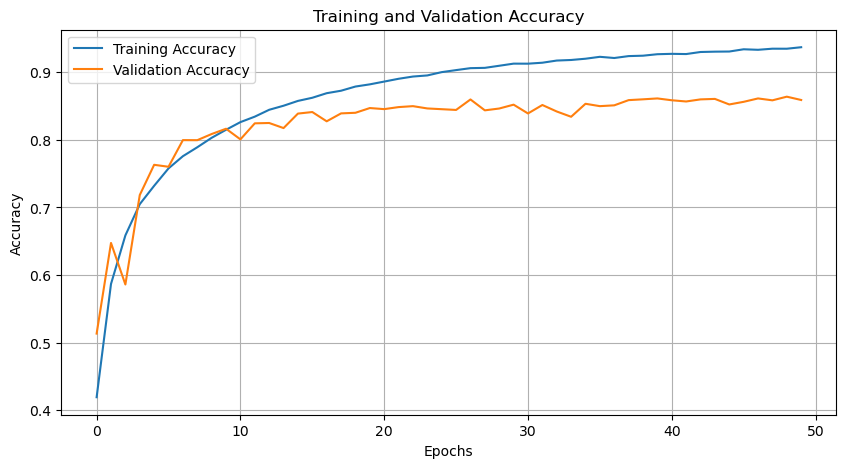

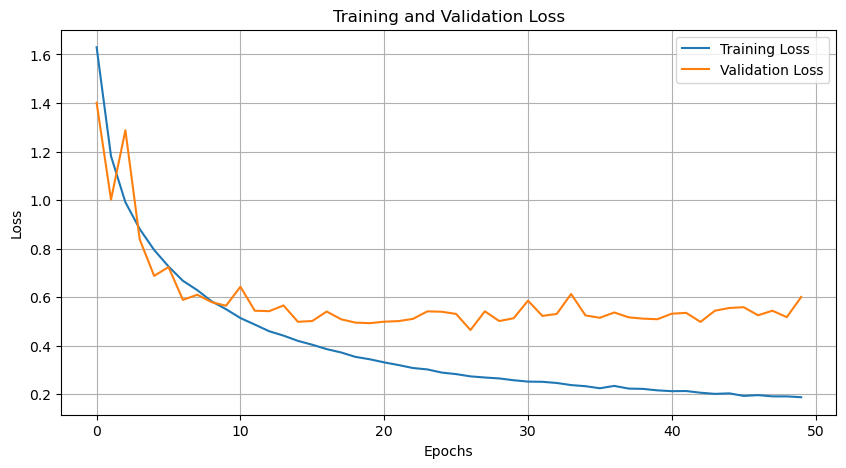

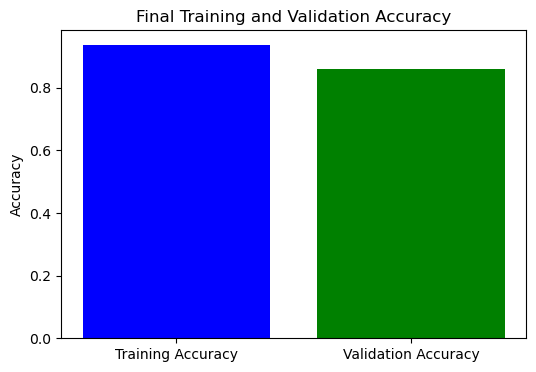

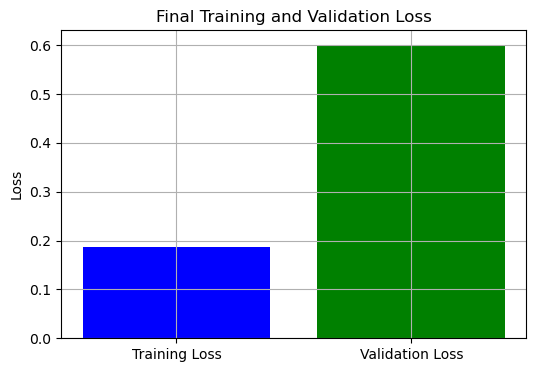

In [28]:
#visualising metrics
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Bar chart for final training and validation accuracy
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
plt.figure(figsize=(6, 4))
plt.bar(['Training Accuracy', 'Validation Accuracy'], [train_acc, val_acc], color=['blue', 'green'])
plt.title('Final Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.show()

# Bar chart for final training and validation loss
train_loss = history.history['loss'][-1]  # Last training loss value
val_loss = history.history['val_loss'][-1]  # Last validation loss value

# Create the bar chart
plt.figure(figsize=(6, 4))
plt.bar(['Training Loss', 'Validation Loss'], [train_loss, val_loss], color=['blue', 'green'])
plt.title('Final Training and Validation Loss')
plt.ylabel('Loss')
plt.grid(True)  # Add grid lines for better readability
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step


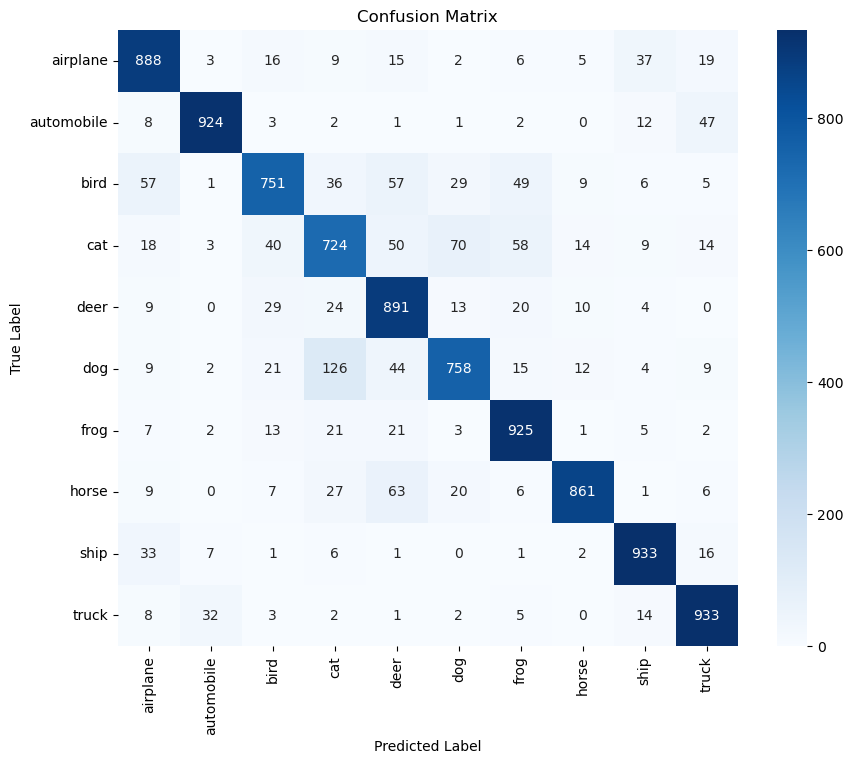

              precision    recall  f1-score   support

    airplane       0.85      0.89      0.87      1000
  automobile       0.95      0.92      0.94      1000
        bird       0.85      0.75      0.80      1000
         cat       0.74      0.72      0.73      1000
        deer       0.78      0.89      0.83      1000
         dog       0.84      0.76      0.80      1000
        frog       0.85      0.93      0.89      1000
       horse       0.94      0.86      0.90      1000
        ship       0.91      0.93      0.92      1000
       truck       0.89      0.93      0.91      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



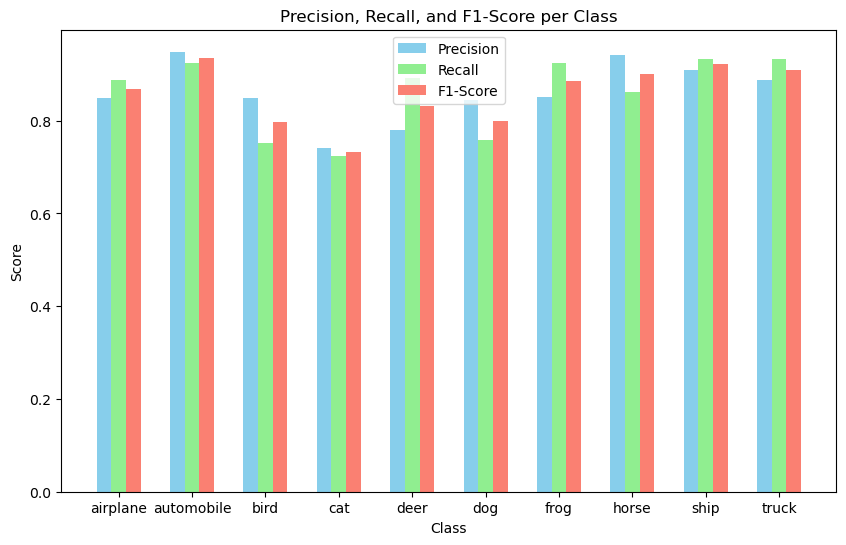

C:\Users\pbele\AppData\Local\Temp\ipykernel_18340\2657045275.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_names, y=total_predictions, palette='Blues_d')


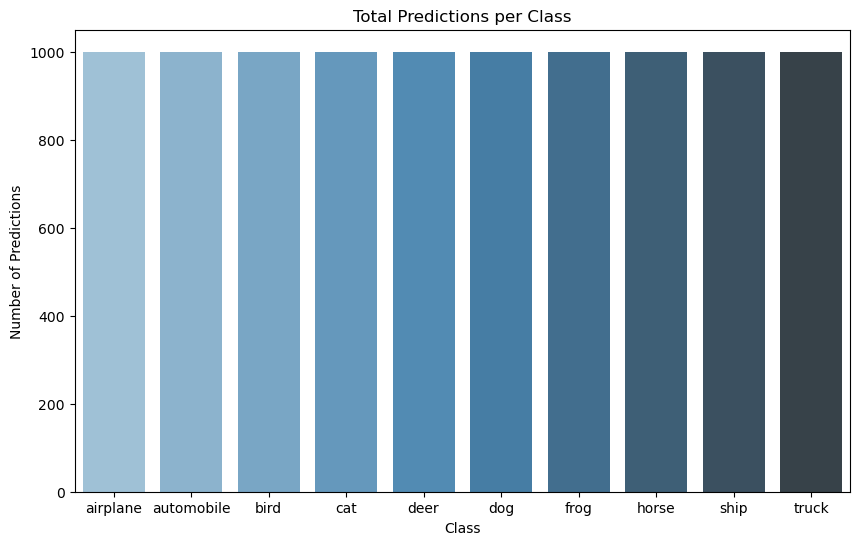

In [29]:
#model evaluation +visualisation

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels
y_true = np.argmax(y_test, axis=1)  # Convert true labels to class labels

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification report
report = classification_report(y_true, y_pred_classes, target_names=class_names, output_dict=True)
print(classification_report(y_true, y_pred_classes, target_names=class_names))

# Extracting precision, recall, and F1-score for bar chart plotting
precision = [report[label]['precision'] for label in class_names]
recall = [report[label]['recall'] for label in class_names]
f1_score = [report[label]['f1-score'] for label in class_names]

# Plotting Precision, Recall, and F1-score bar charts
x = np.arange(len(class_names))  # Label locations
width = 0.2  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, precision, width, label='Precision', color='skyblue')
rects2 = ax.bar(x, recall, width, label='Recall', color='lightgreen')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score', color='salmon')

# Add some text for labels, title, and custom x-axis tick labels
ax.set_xlabel('Class')
ax.set_ylabel('Score')
ax.set_title('Precision, Recall, and F1-Score per Class')
ax.set_xticks(x)
ax.set_xticklabels(class_names)
ax.legend()

# Display the bar chart
plt.show()

# Plotting total predictions per class
total_predictions = np.sum(conf_matrix, axis=1)
plt.figure(figsize=(10, 6))
sns.barplot(x=class_names, y=total_predictions, palette='Blues_d')
plt.title('Total Predictions per Class')
plt.xlabel('Class')
plt.ylabel('Number of Predictions')
plt.show()